## **Deep AutoVIML** - Tabular Task w/ including a free text column
Reference:
* https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Titanic.ipynb
* https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Demo.ipynb 

In [4]:
# ! pip install deep_autoviml
# ! pip install split_data_n_ways

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

## Load Dataset
Using Kaggle [Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction) provided by user fedesoriano

**Tabular Data Classification**: To predict heart disease [1: heart disease, 0: Normal] using the following attributes
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

In [8]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 3.39MB/s]


In [10]:
! unzip heart-failure-prediction

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [13]:
trainpath = "/content/heart.csv"
df_heart_disease = pd.read_csv(trainpath, encoding='ISO-8859-1')

In [14]:
df_heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
target = 'HeartDisease'
df_heart_disease[target].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_heart_disease.drop(columns=['HeartDisease']), df_heart_disease['HeartDisease'], 
                                                    train_size=0.75,
                                                    test_size=0.15,
                                                    random_state=122)

In [25]:
train_X['HeartDisease'] = train_y
train_X.to_csv('/content/heart_disease_train.csv')
test_X['HeartDisease'] = test_y
test_X.to_csv('/content/heart_disease_test.csv')

# Deep AutoVIML

### Model Config

In [29]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "heart_disease_classification"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

### Model Training

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = 

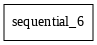

Model plot saved in file: deep_autoviml_heart_disease_classification_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.1582491582491583, 1: 1.0}
    original datasize = 689, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1100
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = d

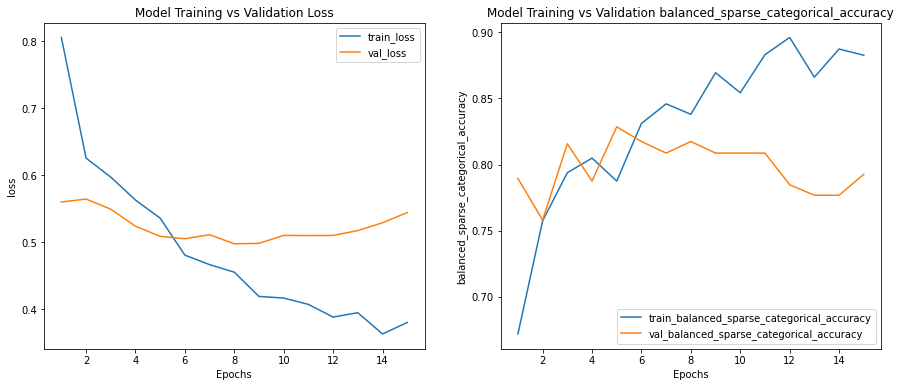

Time taken to train model (in mins) = 1
    Stopped epoch = 5
Held out data actuals shape: (96,)
    samples from label: [0, 1, 1, 1, 0, 1, 0, 1, 0, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 1 1 1 0 0 1 1 0 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: HeartDisease
#################################################################


    Accuracy          = 83.3%
    Balanced Accuracy = 83.4%
    Precision         = 85.4%
    Average Precision = 83.3%
    Recall            = 82.0%
    F1 Score          = 83.7%
    ROC AUC           = 89.4%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0008527926
    set learning rate using best model: 0.0008527926
    max epochs for training = 5

Model not being saved since save_model_flag set to False...
5932

Saving vocab dictionary using pickle in heart_disease_classification/auto/model_2021_10_28-07_56_02/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in heart_disease_classification/auto/model_2021_10_28-07_56_02/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in heart_disease_classification/auto/model_2021_10_28-07_56_02/artifacts/var_df.pickle...will take time...
    Saved pickle file in heart_disease_classification/auto

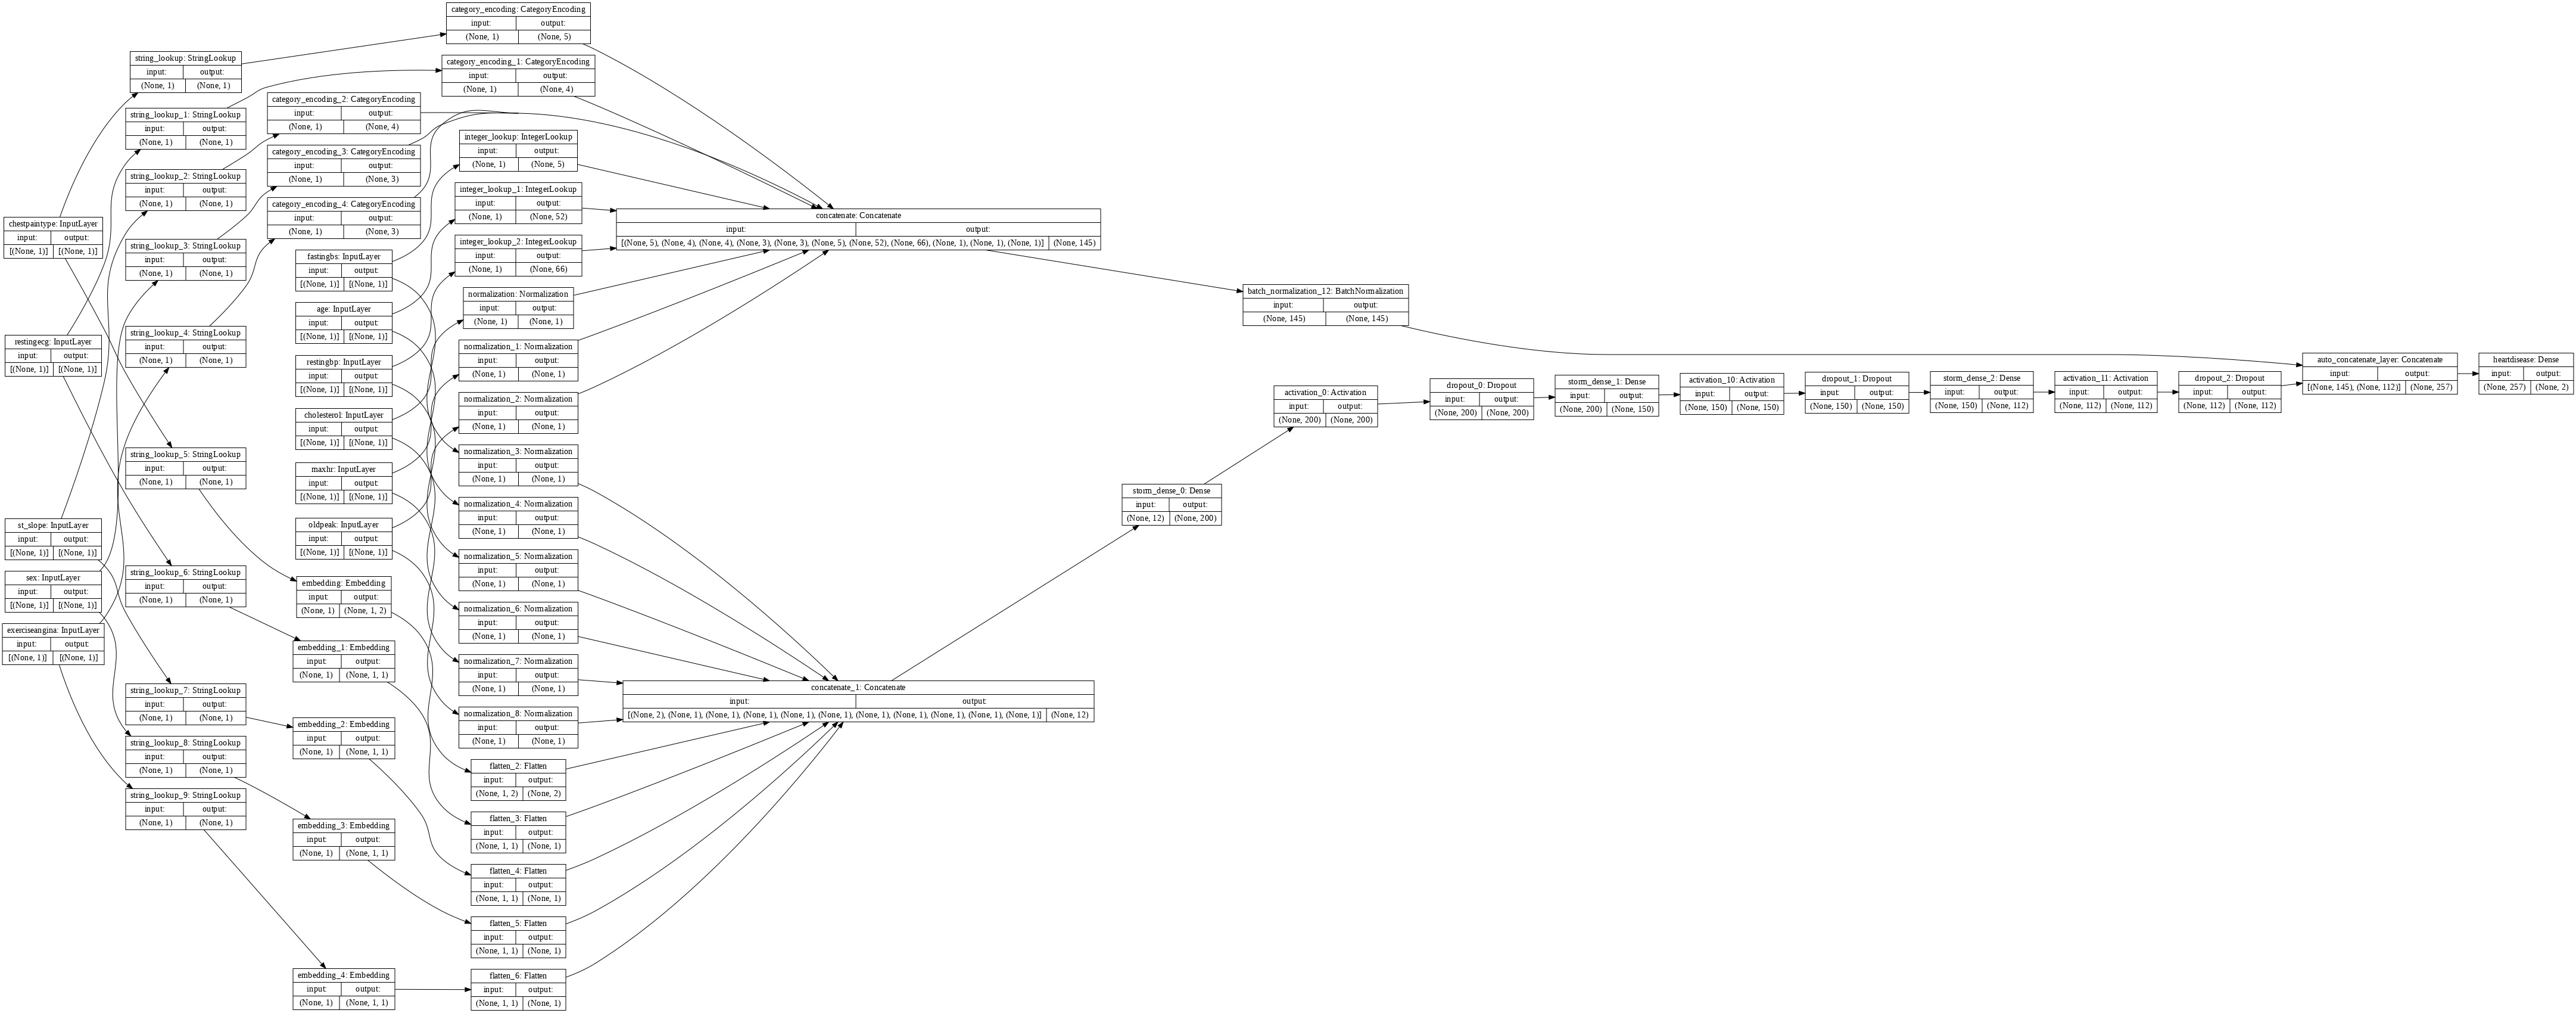

Model plot saved in file: deep_autoviml_heart_disease_classification_auto_model_after.png


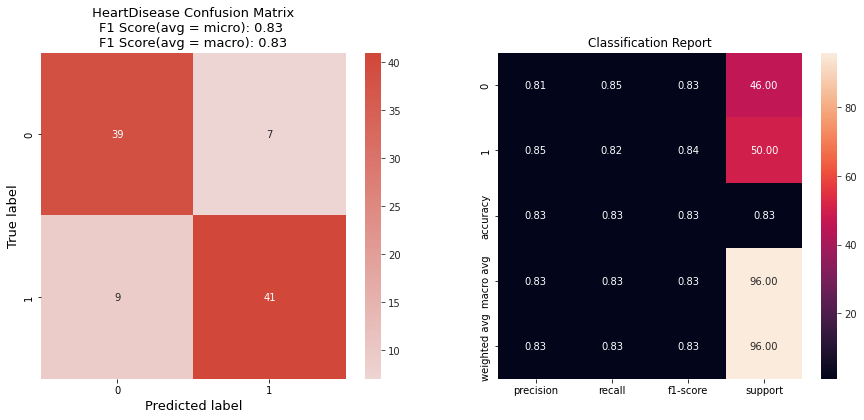

In [30]:
model, cat_vocab_dict = deepauto.fit('/content/heart_disease_train.csv', target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=2)

## Prediction

In [31]:
testpath = '/content/heart_disease_test.csv'
predictions = deepauto.predict(model, project_name=project_name, test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f0e631d4bd0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f0e631d4bd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 138
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    13 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 2, cats = 3, high cats = 0, very high cats = 0
Distribution of integer columns in datatset:
    number of binary = 2, cat

In [33]:
test = pd.read_csv(testpath)
predictions[0][:5]

array([[0.258, 0.699],
       [0.801, 0.235],
       [0.237, 0.669],
       [0.65 , 0.276],
       [0.555, 0.37 ]], dtype=float32)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        65
           1       0.80      0.82      0.81        73

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138



In [38]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(test[target].values, predictions[1])))

Balanced Accuracy = 79.6%
